# 1.0 - IMPORTS

## 1.1 - LIBRARIES

In [97]:
import pandas as pd
import numpy as np
import inflection
import matplotlib.pyplot as plt

## 1.2 - LOAD DATA

In [63]:
df_raw = pd.read_csv('../dataset/zomato.csv', low_memory=False, encoding='ISO-8859-1')

## 1.3 - HELPER FUNCTIONS

### 1.3.1 - RENAME COLUMNS FUNCTION

In [64]:
def rename_columns(column_name):
    words = column_name.split()
    return '_'.join(words).lower()

### 1.3.2 - NA VOLUMETRY

In [65]:
def na_volumetry(df):

    df_na = pd.DataFrame()
    df_na['attributes'] = df.columns
    df_na['quantity'] = ''
    df_na['percentual'] = ''

    for i in df_na.index:
        df_na.quantity[i]    = df[df_na['attributes'][i]].isna().sum()
        df_na.percentual[i]  = (df[df_na['attributes'][i]].isna().sum()/df['restaurant_id'].count())*100
    
    return df_na

### 1.3.3 - OUTLIERS VOLUMETRY

In [101]:
# Creating the subplots for the dashbord of the boxplot
def outliers_volumetry(df):
    
    df_num = pd.DataFrame()
    df_num = df.select_dtypes(exclude = 'object')
    outlier = []

    for i in df_num.columns:
        q1 = np.quantile(df_num[i], 0.25)
        q3 = np.quantile(df_num[i], 0.75)
        interquartile_distance = q3 - q1
        upper_limit = q3 + 1.5 * interquartile_distance
        lower_limit = q1 - 1.5 * interquartile_distance
        outliers = 0
        for j in df_num.index:
            if df_num[i][j] > upper_limit:
                outliers = outliers + 1
            elif df_num[i][j] < lower_limit:
                outliers = outliers + 1
            else:
                pass

        outlier.append(outliers)

    df_outlier = pd.DataFrame()
    df_outlier['attributes']    = df_num.columns
    df_outlier['quantity']      =   outlier
    df_outlier['percentual']    =   (outlier/df_num['restaurant_id'].count())*100

    return df_outlier 


def boxplot_volumetry(df):

    df_numerical = df.select_dtypes(exclude = 'object')
    plt.figure(figsize=(15, 12))
    plt.subplots_adjust(hspace=0.5)
    plt.suptitle("Volumetry of Outliers", fontsize=18)

    # loop through the length of pointer and keep track of index
    for n, pointer in enumerate(df_numerical.columns):
        
        # add a new subplot iteratively
        ax = plt.subplot(5, 3, n + 1)

        # create a boxplot for the pointer on the new subplot axis
        df_numerical[pointer].plot(kind='box', ax=ax)

        # chart formatting
        ax.set_title(pointer.upper())
        ax.set_xlabel("")

    return plt.show()

# 2.0 - DATA CLEANING

In [66]:
df2 = df_raw.copy()

## 2.1 - DATA DIMENSION

In [67]:
unique_data = df2.apply(lambda x: x.nunique())
rows = df2.shape[0]
cols = df2.shape[1]
print('The Dataset have {} columns and {} rows'.format(cols, rows))
print('\nAmount of unique data for data feature:\n\n{}'.format(unique_data))

The Dataset have 21 columns and 9551 rows

Amount of unique data for data feature:

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64


## 2.2 - RENAME COLUMNS

In [68]:

df2.columns = [rename_columns(columns) for columns in df2.columns]
df2.columns


Index(['restaurant_id', 'restaurant_name', 'country_code', 'city', 'address',
       'locality', 'locality_verbose', 'longitude', 'latitude', 'cuisines',
       'average_cost_for_two', 'currency', 'has_table_booking',
       'has_online_delivery', 'is_delivering_now', 'switch_to_order_menu',
       'price_range', 'aggregate_rating', 'rating_color', 'rating_text',
       'votes'],
      dtype='object')

## 2.3 - DATA TYPES

In [69]:
df2.dtypes

restaurant_id             int64
restaurant_name          object
country_code              int64
city                     object
address                  object
locality                 object
locality_verbose         object
longitude               float64
latitude                float64
cuisines                 object
average_cost_for_two      int64
currency                 object
has_table_booking        object
has_online_delivery      object
is_delivering_now        object
switch_to_order_menu     object
price_range               int64
aggregate_rating        float64
rating_color             object
rating_text              object
votes                     int64
dtype: object

## 2.4 - NA VOLUMETRY

In [70]:
df2.isna().sum()

restaurant_id           0
restaurant_name         0
country_code            0
city                    0
address                 0
locality                0
locality_verbose        0
longitude               0
latitude                0
cuisines                9
average_cost_for_two    0
currency                0
has_table_booking       0
has_online_delivery     0
is_delivering_now       0
switch_to_order_menu    0
price_range             0
aggregate_rating        0
rating_color            0
rating_text             0
votes                   0
dtype: int64

In [71]:
na_volumetry(df2)

,attributes,quantity,percentual
0,restaurant_id,0,0.0
1,restaurant_name,0,0.0
2,country_code,0,0.0
3,city,0,0.0
4,address,0,0.0
5,locality,0,0.0
6,locality_verbose,0,0.0
7,longitude,0,0.0
8,latitude,0,0.0
9,cuisines,9,0.094231


In [72]:
df2 = df2.dropna(subset=['cuisines'])

## 2.5 - NULL VOLUMETRY

In [73]:
df2.isnull().sum()

restaurant_id           0
restaurant_name         0
country_code            0
city                    0
address                 0
locality                0
locality_verbose        0
longitude               0
latitude                0
cuisines                0
average_cost_for_two    0
currency                0
has_table_booking       0
has_online_delivery     0
is_delivering_now       0
switch_to_order_menu    0
price_range             0
aggregate_rating        0
rating_color            0
rating_text             0
votes                   0
dtype: int64

## 2.6 - OUTLIERS VOLUMETRY

In [83]:
outliers_volumetry(df2)

,attributes,quantity,percentual
0,restaurant_id,0,0.000000
1,country_code,890,9.327185
2,longitude,1944,20.373087
3,latitude,1974,20.687487
4,average_cost_for_two,853,8.939426
5,price_range,586,6.141270
6,aggregate_rating,2148,22.511004
7,votes,1131,11.852861


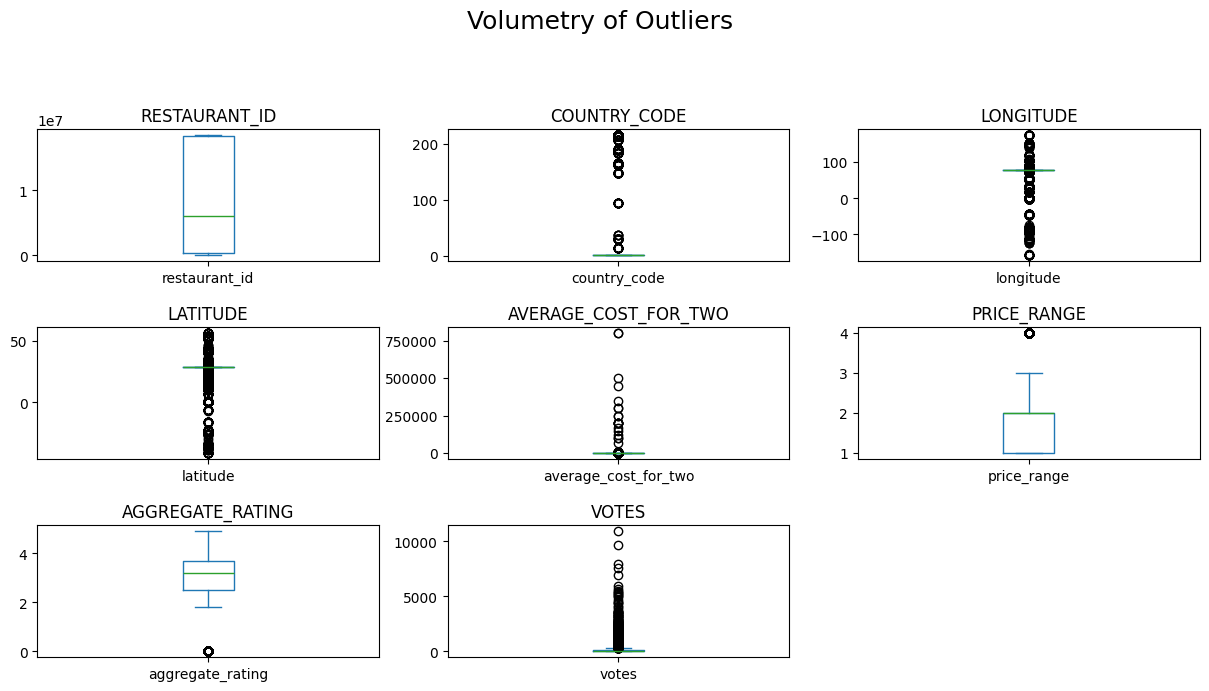

In [102]:
boxplot_volumetry(df2)

# 3.0 - DESCRIPTIVE STATISTICS

In [105]:
df3 = df2.copy()

In [106]:
df2_num = pd.DataFrame()
df2_cat = pd.DataFrame()

df2_num = df2.select_dtypes(exclude = 'object')
df2_cat = df2.select_dtypes(include = 'object')

# Tendence central:
# - Mean
# - Median

central_tendence1 = pd.DataFrame(df2_num.apply(lambda x: np.mean(x))).T
central_tendence2 = pd.DataFrame(df2_num.apply(lambda x: np.median(x))).T

# Dispersion:
# - Max
# - Min
# - Range
# - Standart Deviation
# - Skew
# - Kurtosis

dispersion1 = pd.DataFrame(df2_num.apply(lambda x: np.std(x))).T
dispersion2 = pd.DataFrame(df2_num.apply(min)).T
dispersion3 = pd.DataFrame(df2_num.apply(max)).T
dispersion4 = pd.DataFrame(df2_num.apply(lambda x: x.min() - x.max())).T
dispersion5 = pd.DataFrame(df2_num.apply(lambda x: x.skew())).T
dispersion6 = pd.DataFrame(df2_num.apply(lambda x: x.kurtosis())).T

# Concatenating the dataframes

metrics = pd.concat([central_tendence1, central_tendence2, dispersion1, dispersion2, dispersion3, dispersion4, dispersion5, dispersion6]).T.reset_index()
metrics.columns = ['attribuites', 'mean', 'median', 'standart deviation', 'min', 'max', 'range', 'skew', 'kurtosis']
metrics

,attribuites,mean,median,standart deviation,min,max,range,skew,kurtosis
0,restaurant_id,9.043301e+06,6.002726e+06,8.791507e+06,53.000000,1.850065e+07,-1.850060e+07,0.063496,-1.950750
1,country_code,1.817921e+01,1.000000e+00,5.644864e+01,1.000000,2.160000e+02,-2.150000e+02,3.064922,7.523150
2,longitude,6.427500e+01,7.719203e+01,4.119544e+01,-157.948486,1.748321e+02,-3.327806e+02,-2.819828,8.330206
3,latitude,2.584853e+01,2.857044e+01,1.100952e+01,-41.330428,5.597698e+01,-9.730741e+01,-3.081780,12.525761
4,average_cost_for_two,1.200326e+03,4.000000e+02,1.612790e+04,0.000000,8.000000e+05,-8.000000e+05,35.461264,1494.371209
5,price_range,1.804968e+00,2.000000e+00,9.055156e-01,1.000000,4.000000e+00,-3.000000e+00,0.889879,-0.141135
6,aggregate_rating,2.665238e+00,3.200000e+00,1.516508e+00,0.000000,4.900000e+00,-4.900000e+00,-0.953052,-0.584832
7,votes,1.567721e+02,3.100000e+01,4.301808e+02,0.000000,1.093400e+04,-1.093400e+04,8.813270,128.316022


# 4.0 - FEATURE ENGINEERING

In [107]:
df4 = df3.copy()